In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [2]:
# ------------------------------------------------------------
# 1. Load CIFAR-10 dataset
# ------------------------------------------------------------
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# One-hot encode labels (10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# ------------------------------------------------------------
# 2. Build the CNN model
# ------------------------------------------------------------
model = Sequential()

# Conv Layer 1: 32 filters, 3x3 kernel, ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Layer 2: 64 filters, 3x3 kernel, ReLU activation
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Layer 3: 128 filters, 3x3 kernel, ReLU activation
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten before fully connected layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

In [7]:
# ------------------------------------------------------------
# 3. Compile the model
# ------------------------------------------------------------
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# ------------------------------------------------------------
# 4. Train the model
# ------------------------------------------------------------
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1 )


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 67s 92ms/step - accuracy: 0.3385 - loss: 1.7843 - val_accuracy: 0.5250 - val_loss: 1.3361
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.5606 - loss: 1.2410 - val_accuracy: 0.6142 - val_loss: 1.0989
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 88ms/step - accuracy: 0.6295 - loss: 1.0541 - val_accuracy: 0.6554 - val_loss: 0.9939
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 88ms/step - accuracy: 0.6745 - loss: 0.9263 - val_accuracy: 0.6542 - val_loss: 0.9983
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 63s 89ms/step - accuracy: 0.7084 - loss: 0.8361 - val_accuracy: 0.6758 - val_loss: 0.9760
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.7335 - loss: 0.7666 - val_accuracy: 0.6938 - val_loss: 0.8904
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 91ms/step - accuracy: 0.7613 - loss: 0.6850 - val_accuracy: 0.7076 - val_loss: 0.8265
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 63s 90ms/step - accuracy: 0.7811 - loss: 0.6259 - 

In [9]:
# ------------------------------------------------------------
# 5. Evaluate on test data
# ------------------------------------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7019 - loss: 1.3705
Test Accuracy: 0.7033


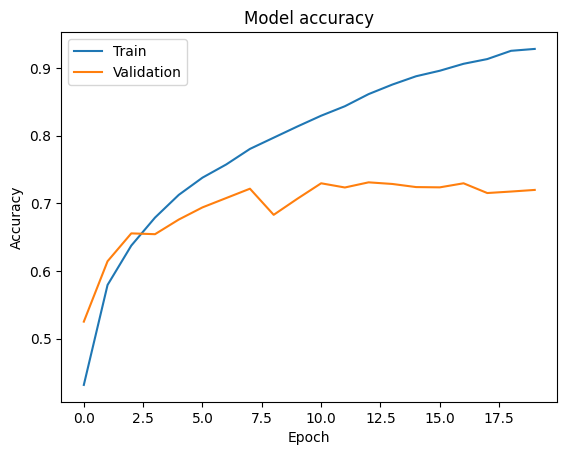

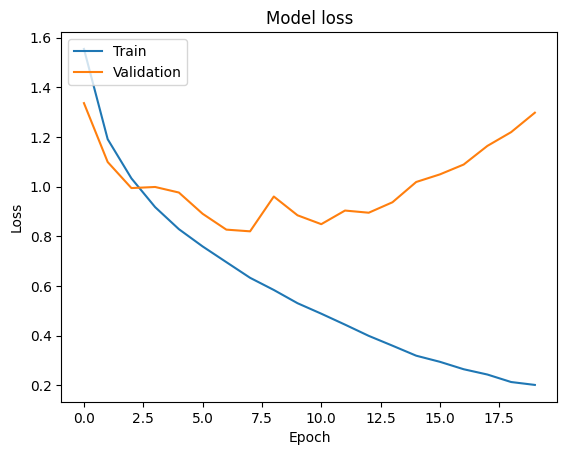

In [10]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

